# PyTorch - Introduction to Linear Regression

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Define the parameters:
import numpy as np
weight = np.random.randn(1).item()
bias = np.random.randn(1).item()

In [3]:
# Define a default straight line:
X = torch.arange(-3,3,0.1).unsqueeze(1)
y = weight*X + bias

In [4]:
# Print the properties of X and y:
print(f"""Properties of X:
      Shape: {X.shape}, 
      Size: {X.size()}, 
      Type: {X.dtype}, 
      Device: {X.device}
Properties of y:
      Shape: {y.shape}, 
      Size: {y.size()}, 
      Type: {y.dtype}, 
      Device: {y.device}"""
)

Properties of X:
      Shape: torch.Size([60, 1]), 
      Size: torch.Size([60, 1]), 
      Type: torch.float32, 
      Device: cpu
Properties of y:
      Shape: torch.Size([60, 1]), 
      Size: torch.Size([60, 1]), 
      Type: torch.float32, 
      Device: cpu


In [5]:
# Create a train/test split:
train_split = int(len(X)*0.8)
X_train, X_test = X[:train_split], X[train_split:] 
y_train, y_test = y[:train_split], y[train_split:]

In [6]:
# Print the properties of the training and testing data:
print(f"""Properties of X_train:
    Shape: {X_train.shape}, 
    Size: {X_train.size()}, 
    Type: {X_train.dtype}, 
    Device: {X_train.device}
Properties of y_train:
    Shape: {y_train.shape},
    Size: {y_train.size()},
    Type: {y_train.dtype},
    Device: {y_train.device},
Properties of X_test:
    Shape: {X_test.shape},
    Size: {X_test.size()},
    Type: {X_test.dtype},
    Device: {X_test.device},
Properties of y_test:
    Shape: {y_test.shape},
    Size: {y_test.size()},
    Type: {y_test.dtype},
    Device: {y_test.device}""")      

Properties of X_train:
    Shape: torch.Size([48, 1]), 
    Size: torch.Size([48, 1]), 
    Type: torch.float32, 
    Device: cpu
Properties of y_train:
    Shape: torch.Size([48, 1]),
    Size: torch.Size([48, 1]),
    Type: torch.float32,
    Device: cpu,
Properties of X_test:
    Shape: torch.Size([12, 1]),
    Size: torch.Size([12, 1]),
    Type: torch.float32,
    Device: cpu,
Properties of y_test:
    Shape: torch.Size([12, 1]),
    Size: torch.Size([12, 1]),
    Type: torch.float32,
    Device: cpu


In [7]:
# Write Device agnostic code:
device = "cuda" if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [8]:
# Send training and testing data to the device:
X_train, X_test = X_train.to(device), X_test.to(device)
y_train, y_test =  y_train.to(device), y_test.to(device)

In [9]:
# Create function to check the properties of training and testing data:
def check_data(Training_data, Training_labels, Testing_Data, Testing_labels):
    print(f"""Properties of X_train:
          Shape: {Training_data.shape},
          Size: {Training_data.size()},
          Type: {Training_data.dtype},
          Device: {Training_data.device},
Properties of y_train:
          Shape: {Training_labels.shape},
          Size: {Training_labels.size()},
          Type: {Training_labels.dtype},
          Device: {Training_labels.device},
Properties of X_test:
          Shape: {Testing_Data.shape},
          Size: {Testing_Data.size()},
          Type: {Testing_Data.dtype},
          Device: {Testing_Data.device},
Properties of y_test:
          Shape: {Testing_labels.shape},
          Size: {Testing_labels.size()},
          Type: {Testing_labels.dtype},
          Device: {Testing_labels.device}""")    

In [10]:
# Check whether data changed:
check_data(X_train, y_train, X_test, y_test)

Properties of X_train:
          Shape: torch.Size([48, 1]),
          Size: torch.Size([48, 1]),
          Type: torch.float32,
          Device: cpu,
Properties of y_train:
          Shape: torch.Size([48, 1]),
          Size: torch.Size([48, 1]),
          Type: torch.float32,
          Device: cpu,
Properties of X_test:
          Shape: torch.Size([12, 1]),
          Size: torch.Size([12, 1]),
          Type: torch.float32,
          Device: cpu,
Properties of y_test:
          Shape: torch.Size([12, 1]),
          Size: torch.Size([12, 1]),
          Type: torch.float32,
          Device: cpu


In [11]:
# Define a function to plot the data:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None,
                     device='cpu'):
    """Plots the training data and testing data
    Also plots the predictions if provided"""
    train_data, train_labels, test_data, test_labels = train_data.to(device), train_labels.to(device), test_data.to(device), test_labels.to(device)
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
    
    plt.legend(prop={'size':14})
    plt.show()

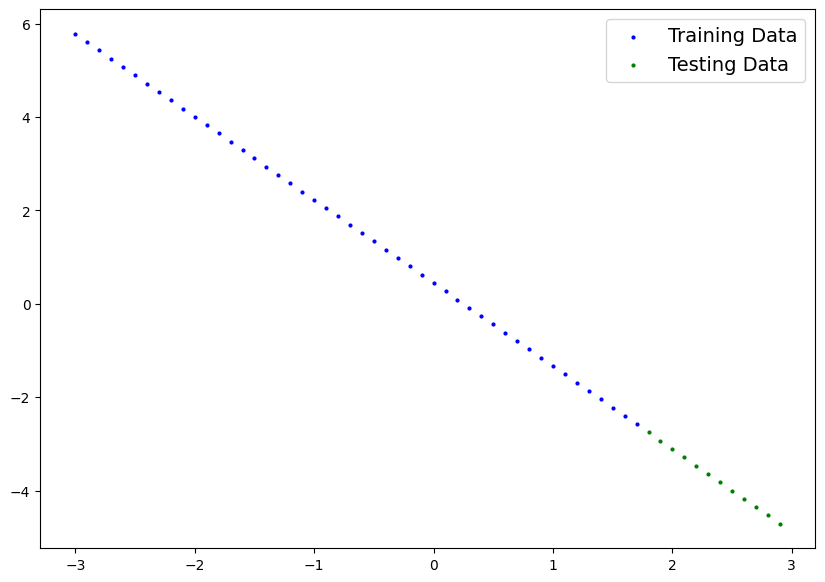

In [12]:
# Plot the data:
plot_predictions(train_data=X_train, test_data=X_test, train_labels=y_train, test_labels=y_test, device=device, predictions=None)

In [13]:
# Define a class for the Linear Regression Model:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = torch.nn.Parameter(torch.randn(1,
                                                      requires_grad=True,
                                                      dtype=torch.float32))
        self.bias = torch.nn.Parameter(torch.randn(1,
                                                   requires_grad=True,
                                                   dtype=torch.float32))
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

In [14]:
# Create an instance of class Linear Regression Model
model_0_29_11_23 = LinearRegressionModel()

In [15]:
def Model_Properties(model):
    """Prints the properties of a model"""
    print(f"""model parameters: \n{model.parameters()}, \n{model.parameters},\n{next(model.parameters())} \nList of Parameters: \n{list(model.parameters())}\n
model_state_dict: \n{model.state_dict()}\n
model_named_parameters: \n{model.named_parameters()}
{list(model_0_29_11_23.named_parameters())},\n {next(model_0_29_11_23.named_parameters())}

""")

In [16]:
Model_Properties(model_0_29_11_23)

model parameters: 
<generator object Module.parameters at 0x0000023A273A8040>, 
<bound method Module.parameters of LinearRegressionModel()>,
Parameter containing:
tensor([-1.1078], requires_grad=True) 
List of Parameters: 
[Parameter containing:
tensor([-1.1078], requires_grad=True), Parameter containing:
tensor([1.4477], requires_grad=True)]

model_state_dict: 
OrderedDict([('weights', tensor([-1.1078])), ('bias', tensor([1.4477]))])

model_named_parameters: 
<generator object Module.named_parameters at 0x0000023A2CDE2E40>
[('weights', Parameter containing:
tensor([-1.1078], requires_grad=True)), ('bias', Parameter containing:
tensor([1.4477], requires_grad=True))],
 ('weights', Parameter containing:
tensor([-1.1078], requires_grad=True))




In [17]:
# Send model to device!
model_0_29_11_23.to(device)

LinearRegressionModel()

In [18]:
# Make test predictions by the model:
model_0_29_11_23.eval()
with torch.inference_mode():
    y_preds = model_0_29_11_23(X_test)

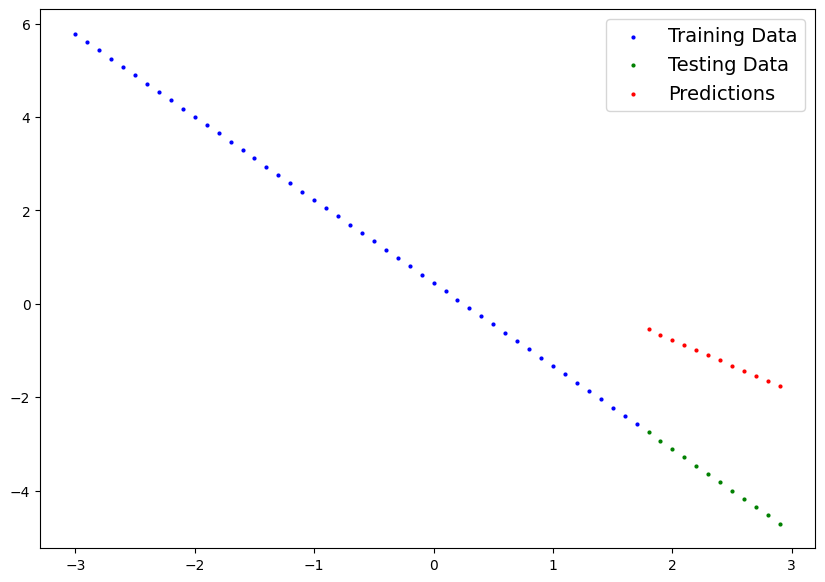

In [19]:
# Plot the predictions:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds,
                 device=device)

In [20]:
# Setup a loss function:
loss_fn = torch.nn.L1Loss()
LR = 0.0001
# Setup an optimizer:
optimizer = torch.optim.SGD(params=model_0_29_11_23.parameters(), lr=LR)

In [21]:
# Check loss function and optimizer:
loss_fn, optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.0001
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [22]:
# Build a training loop:
torch.manual_seed(42)

EPOCHS = 1

for epoch in range(EPOCHS):
    model_0_29_11_23.train()
    predictions = model_0_29_11_23(X_train)
    loss = loss_fn(predictions, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_0_29_11_23.eval()
    with torch.inference_mode():
        test_predictions = model_0_29_11_23(X_test)
        test_loss = loss_fn(test_predictions, y_test)
    
    if epoch%100 == 0:       
        print(f"Epoch: {epoch} | Training Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")


Epoch: 0 | Training Loss: 0.9037 | Test Loss: 2.5767


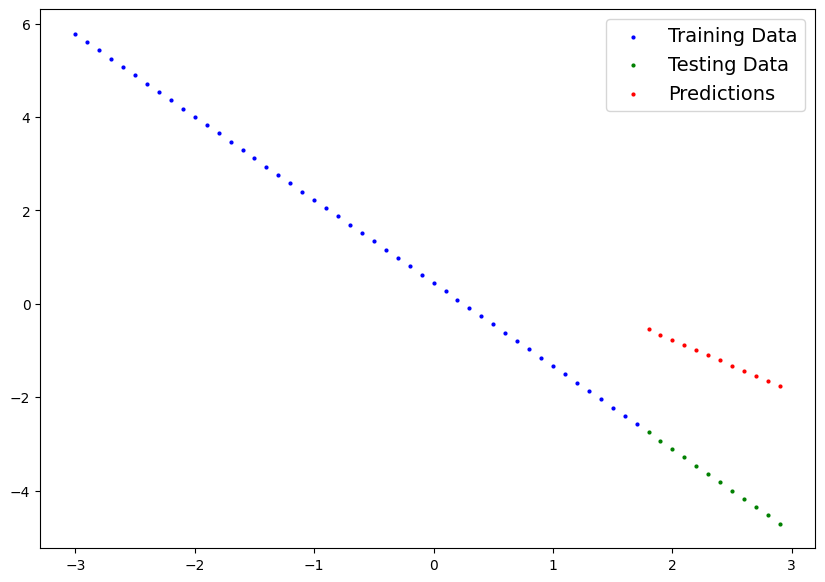

In [23]:
model_0_29_11_23.eval()
with torch.inference_mode():
    predictions=model_0_29_11_23(X_test)

plot_predictions(train_data = X_train, 
                 test_data=X_test,
                 train_labels=y_train,
                 test_labels=y_test,
                 predictions=predictions,
                 device=device)

In [28]:
epoch_count = []
train_loss_values = []
test_loss_values = []

EPOCHS = 20000
torch.manual_seed(42)
for epoch in range(EPOCHS):
    model_0_29_11_23.train()
    train_predictions=model_0_29_11_23(X_train)
    train_loss=loss_fn(train_predictions, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    model_0_29_11_23.eval()
    with torch.inference_mode():
        test_predictions=model_0_29_11_23(X_test)
        test_loss=loss_fn(test_predictions, y_test)
    
    if epoch%100 == 0:
        print(f"Epoch: {epoch} | Training Loss: {train_loss: .4f} |  Test Loss: {test_loss: .4f}")
    
    epoch_count.append(epoch)
    train_loss_values.append(train_loss)
    test_loss_values.append(test_loss)

print(f"""
##### Summary #####
Epochs Completed: {epoch_count[-1]}\n
Calculated the training and testing loss for: {len(train_loss_values)} | {len(test_loss_values)}
Data Type of training loss: {type(train_loss_values)}
Data Type of testing loss: {(test_loss_values)}
Dtype of training loss: {train_loss_values[0].dtype}
Dtype of testing loss: {test_loss_values[0].dtype}
Dtype of epochs: {type(epoch_count[0])}
      """)

Epoch: 0 | Training Loss:  0.7018 |  Test Loss:  1.9600
Epoch: 100 | Training Loss:  0.6960 |  Test Loss:  1.9415
Epoch: 200 | Training Loss:  0.6902 |  Test Loss:  1.9231
Epoch: 300 | Training Loss:  0.6848 |  Test Loss:  1.9061
Epoch: 400 | Training Loss:  0.6794 |  Test Loss:  1.8890
Epoch: 500 | Training Loss:  0.6740 |  Test Loss:  1.8719
Epoch: 600 | Training Loss:  0.6687 |  Test Loss:  1.8549
Epoch: 700 | Training Loss:  0.6633 |  Test Loss:  1.8378
Epoch: 800 | Training Loss:  0.6579 |  Test Loss:  1.8207
Epoch: 900 | Training Loss:  0.6525 |  Test Loss:  1.8037
Epoch: 1000 | Training Loss:  0.6471 |  Test Loss:  1.7866
Epoch: 1100 | Training Loss:  0.6417 |  Test Loss:  1.7695
Epoch: 1200 | Training Loss:  0.6363 |  Test Loss:  1.7526
Epoch: 1300 | Training Loss:  0.6312 |  Test Loss:  1.7371
Epoch: 1400 | Training Loss:  0.6261 |  Test Loss:  1.7215
Epoch: 1500 | Training Loss:  0.6210 |  Test Loss:  1.7060
Epoch: 1600 | Training Loss:  0.6159 |  Test Loss:  1.6905
Epoch: 17

In [29]:
# Convert the data type of epoch which is a list of integers to a numpy array:
epoch_count = np.array(epoch_count)
# Convert the data type of train_loss_values which is a list of tensors to a numpy array:
train_loss_values = torch.tensor(train_loss_values).cpu().numpy()
# Convert the data type of test_loss_values which is a list of tensors to a numpy array:
test_loss_values = torch.tensor(test_loss_values).cpu().numpy()

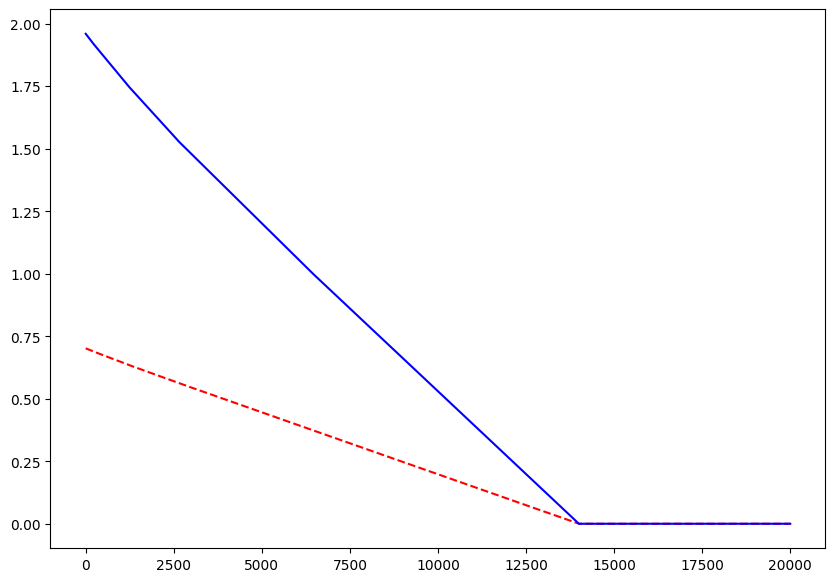

In [30]:
plt.figure(figsize=(10,7))
plt.plot(epoch_count, train_loss_values, 'r--')
plt.plot(epoch_count, test_loss_values, 'b-')
plt.show()

In [32]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '29-11-23_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'Saving model to {MODEL_SAVE_PATH}')
torch.save(obj=model_0_29_11_23.state_dict(), f=MODEL_SAVE_PATH)
print(f'Model saved successfully!')

Saving model to models\29-11-23_model_0.pth
Model saved successfully!


In [34]:
load_model_0_29_11_23 = LinearRegressionModel()

load_model_0_29_11_23.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

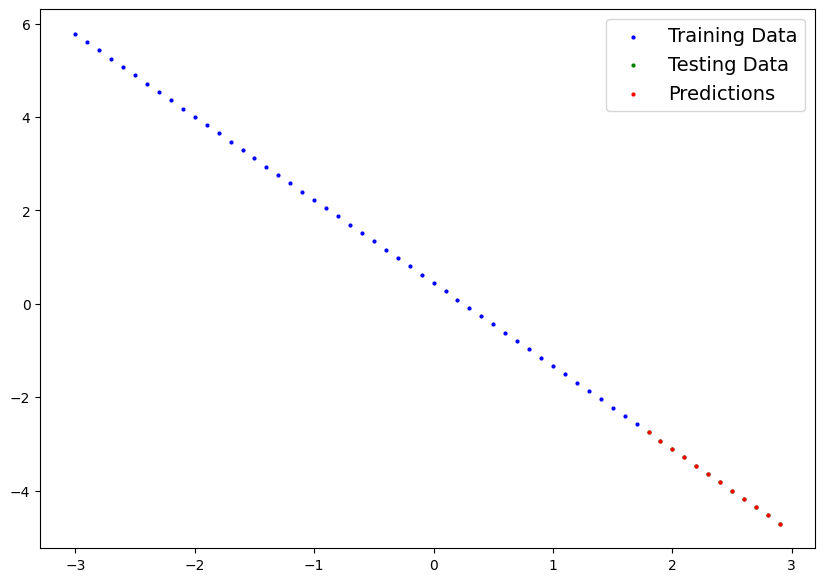

In [35]:
load_model_0_29_11_23.eval()
with torch.inference_mode():
    predictions = load_model_0_29_11_23(X_test)


plot_predictions(train_data=X_train, test_data=X_test, train_labels=y_train, test_labels=y_test,
                 predictions=predictions, device=device)

In [36]:
model_0_29_11_23.eval()
with torch.inference_mode():
    main_predictions=model_0_29_11_23(X_test)

main_predictions == predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])